In [1]:
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
nutrient =pd.read_csv("nutrient.csv",index_col=0)
nutrient.head()

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


In [3]:
scaler = StandardScaler()

In [4]:
nutrientscaled = scaler.fit_transform(nutrient)

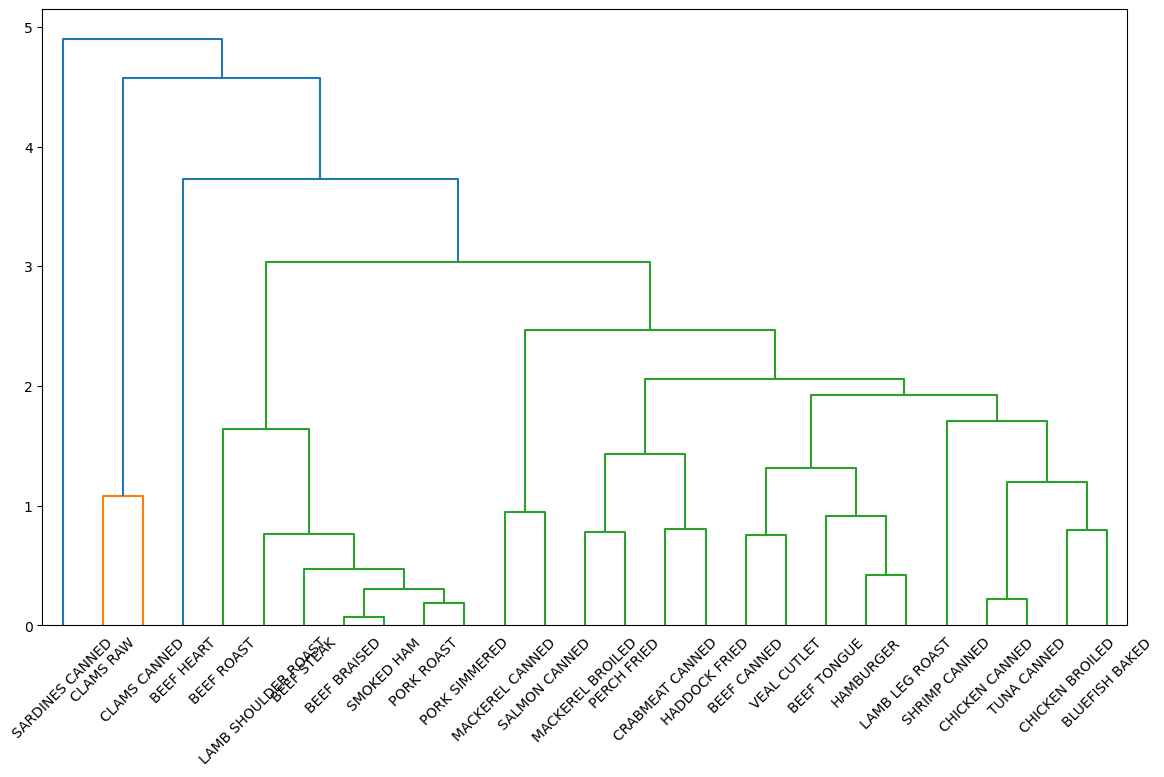

In [5]:
# calculating the linkages
merging = linkage(nutrientscaled,method='average')
plt.figure(figsize=(14,8))
dendrogram(merging,labels=list(nutrient.index),leaf_rotation=45,leaf_font_size=10)
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

In [8]:
clustering = AgglomerativeClustering(n_clusters=2,
                                 linkage='average')
pipe = Pipeline([('SCL',scaler),('CULT',clustering)])
pipe.fit(nutrient)

Pipeline(steps=[('SCL', StandardScaler()),
                ('CULT', AgglomerativeClustering(linkage='average'))])

In [9]:
print("Clustering label",clustering.labels_)
print("silhoute score",silhouette_score(nutrientscaled,clustering.labels_))
print("silhoute score",silhouette_score(nutrient,clustering.labels_))

Clustering label [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
silhoute score 0.41345065968561695
silhoute score 0.5769008738840539
